<a href="https://colab.research.google.com/github/KGF2/DeepLearningAmateur/blob/master/MNISTWithSomeTrails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision 
import torchvision.transforms as transforms

train_set = torchvision.datasets.MNIST(
    root = '.\data'
    ,train = True
    ,download = True
    ,transform = transforms.Compose([transforms.ToTensor()])
)

Extracting .\data/MNIST/raw/train-images-idx3-ubyte.gz to .\data/MNIST/raw


Extracting .\data/MNIST/raw/train-labels-idx1-ubyte.gz to .\data/MNIST/raw


Extracting .\data/MNIST/raw/t10k-images-idx3-ubyte.gz to .\data/MNIST/raw


Extracting .\data/MNIST/raw/t10k-labels-idx1-ubyte.gz to .\data/MNIST/raw
Processing...
Done!


 # 1) Preprocess data
 # 2) build the network
 # 3) loading data
 # 4) training
 # 5) analysis
 



In [2]:
import torch.nn as nn
import torch.nn.functional as F

# DQN

# Hyperparameters

CONV1_OUT_CHANNELS = 6
CONV1_KERNEL_SIZE = 5

CONV2_OUT_CHANNELS = 12
CONV2_KERNEL_SIZE = 5

FC1_OUT_FEATURES = 120
FC2_OUT_FEATURES =  60

class Network (nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=CONV1_OUT_CHANNELS, kernel_size=CONV2_KERNEL_SIZE)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=CONV2_OUT_CHANNELS, kernel_size=CONV2_KERNEL_SIZE)
    self.fc1 = nn.Linear(in_features=12*4*4, out_features=FC1_OUT_FEATURES)
    self.fc2 = nn.Linear(in_features=FC1_OUT_FEATURES, out_features=FC2_OUT_FEATURES)
    self.out = nn.Linear(in_features=FC2_OUT_FEATURES, out_features=10)
  def forward(self, tnsr):
    tnsr = F.relu(self.conv1(tnsr))
    tnsr = F.max_pool2d(tnsr, kernel_size=2, stride=2)
    tnsr = F.relu(self.conv2(tnsr))
    tnsr = F.max_pool2d(tnsr, kernel_size=2, stride=2)
    tnsr = tnsr.reshape([-1, 12*4*4])
    tnsr = F.relu(self.fc1(tnsr))
    tnsr = F.relu(self.fc2(tnsr))
    tnsr = self.out(tnsr)
    return tnsr

In [3]:
import torch.optim as optim

# Batch Training

DQN = Network()

train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=60, shuffle=False)
optimiser = optim.Adagrad(DQN.parameters(), lr=0.01)

def get_num_correct(pred, labels):
  return pred.argmax(dim=1).eq(labels).sum().item()

total_loss_list = []
total_correct_list = []

for epoch in range(2):
  total_loss = 0
  total_correct = 0
  for batch in train_loader:
    images, labels = batch
    pred = DQN(images)
    loss = F.cross_entropy(pred, labels)
    #print(pred.shape, labels.shape)
    optimiser.zero_grad()
    loss.backward(retain_graph=True)
    optimiser.step()
    total_loss += loss.item()
    total_correct += get_num_correct(pred, labels)
  total_correct_list.append(total_correct)
  total_loss_list.append(total_loss)
  print ("epoch : " + str(epoch+1) +"\t"+ "total_entropy_loss : " + str(total_loss) +"\t\t"+ "total_correct_predictions : " + str(total_correct))

epoch : 1	total_entropy_loss : 226.3936652522534		total_correct_predictions : 55776
epoch : 2	total_entropy_loss : 88.89684111136012		total_correct_predictions : 58360


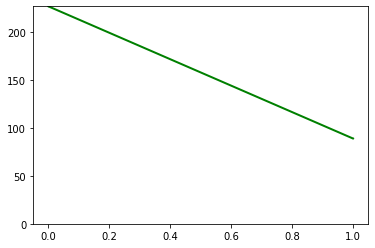

In [4]:
import matplotlib.pyplot as plt
total_loss_list1 = total_loss_list
total_correct_list1 = total_correct_list
x_axis = []
for i in range(len(total_correct_list1)):
  x_axis.append(i)
bottom, top = plt.ylim(0, total_loss_list1[0])
plt.plot(x_axis, total_loss_list1, color='green', marker='o', linewidth=2, markersize=0.5)


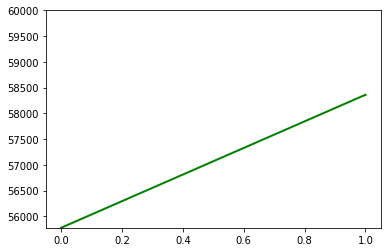

In [5]:
bottom, top = plt.ylim(total_correct_list1[0], 60000)
plt.plot(x_axis, total_correct_list1, color='green', marker='o', linewidth=2, markersize=0.5)

torch.Size([60])


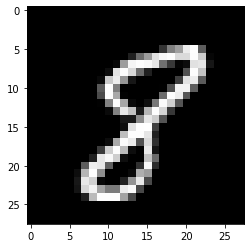

In [6]:
sdf = images.squeeze(dim=1)
print(labels.shape)


plt.imshow(sdf[6], cmap='gray')

In [0]:
 # DQN for hyperparametric optimization

import torch.nn as nn
import torch.nn.functional as F

# DQNH

class DQNH (nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1h = nn.Linear(in_features=6, out_features=120)
    self.fc2h = nn.Linear(in_features=120, out_features=360)
    self.fc3h = nn.Linear(in_features=360, out_features=180)
    self.fc4h = nn.Linear(in_features=180, out_features=120)
    self.fc5h = nn.Linear(in_features=120, out_features=60)
    self.outh = nn.Linear(in_features=60, out_features=6)
  def forward(self, tnsrh):
    tnsrh = F.relu(self.fc1h(tnsrh))
    tnsrh = F.relu(self.fc2h(tnsrh))
    tnsrh = F.relu(self.fc3h(tnsrh))
    tnsrh = F.relu(self.fc4h(tnsrh))
    tnsrh = F.relu(self.fc5h(tnsrh))
    tnsrh = self.outh(tnsrh)
    return tnsrh

In [239]:
import torch.optim as optim
import tensorflow as tf
import numpy as np
import scipy.stats as stats

# Batch Training

BATCH_SIZE = 10

DQN_H = DQNH()

CONV1_OUT_CHANNELS = np.arange(1,BATCH_SIZE+1,1) #ones(BATCH_SIZE)
CONV1_KERNEL_SIZE = np.arange(2,BATCH_SIZE+2,1)
CONV2_OUT_CHANNELS = np.arange(3,BATCH_SIZE+3,1)
CONV2_KERNEL_SIZE = np.arange(4,BATCH_SIZE+4,1)
FC1_OUT_FEATURES = np.arange(5,BATCH_SIZE+5,1)
FC2_OUT_FEATURES = np.arange(6,BATCH_SIZE+6,1)

#CONV1_OUT_CHANNELS = np.random.random(BATCH_SIZE) # AM
#AM = np.mean(CONV1_OUT_CHANNELS)

#CONV1_KERNEL_SIZE = np.random.random(BATCH_SIZE) # median
#MEDIAN = np.median(CONV1_KERNEL_SIZE)

#CONV2_OUT_CHANNELS = np.random.random(BATCH_SIZE) # GM
#GM = stats.mstats.gmean(CONV2_OUT_CHANNELS)

#CONV2_KERNEL_SIZE = np.random.random(BATCH_SIZE) # HM
#HM = stats.hmean(CONV2_KERNEL_SIZE)

#FC1_OUT_FEATURES = np.random.random(BATCH_SIZE) # SD
#SD = np.std(FC1_OUT_FEATURES)

#FC2_OUT_FEATURES = np.random.random(BATCH_SIZE) # variance
#VAR = np.var(FC2_OUT_FEATURES)

HP = np.stack((CONV1_OUT_CHANNELS, CONV1_KERNEL_SIZE, CONV2_OUT_CHANNELS, CONV2_KERNEL_SIZE, FC1_OUT_FEATURES, FC2_OUT_FEATURES))
#HP = torch.tensor(HP, dtype=torch.float32)

def calc_labels(data_loader):
  AM = np.mean(data_loader)
  MEDIAN = np.median(data_loader)
  GM = stats.mstats.gmean(data_loader)
  HM = stats.hmean(data_loader)
  SD = np.std(data_loader)
  VAR = np.var(data_loader)
  labelsh = np.array([AM,MEDIAN,GM,HM,SD,VAR])
  labelsh = torch.tensor(labelsh, dtype=torch.float32)
  return labelsh

print(HP)

IN_FEATURES = len(HP)

loss_fn = torch.nn.MSELoss(reduction='sum')

#labelsh = torch.tensor(([AM,MEDIAN,GM,HM,SD,VAR]), dtype=torch.float32)
#labelsh = torch.rand(6, dtype=torch.float32)

optimiserh = optim.Adam(DQN_H.parameters(), lr=0.01)
#print(DQN_H.fc1h.weight)

total_lossh_per_epoch_list = []
epoch_list = []
for epoch in range(3000):
  total_lossh = 0
  data_loader = torch.tensor((IN_FEATURES, 1))
  for batch in range(BATCH_SIZE):
    data_loader = []
    for i in range(IN_FEATURES):
      data_loader1 = HP[i][batch]
      data_loader.append(data_loader1)
    labelsh = calc_labels(data_loader)
    data_loader = torch.tensor(data_loader, dtype=torch.float32)
    predh = DQN_H(data_loader)
    lossh = loss_fn(predh, labelsh)
    optimiser.zero_grad()
    lossh.backward()
    optimiserh.step()
    total_lossh += lossh.item()
  total_lossh_per_epoch_list.append(total_lossh)
  epoch_list.append(epoch)
  #print(total_lossh_per_epoch_list)
  #print(epoch_list)
  print ("epoch : " + str(epoch) +"\t"+ "total_MSE : " + str(total_lossh), labelsh, predh) #+"\t\t"+ "total_correct_predictions : " + str(total_correcth))


Streaming output truncated to the last 5000 lines.
       grad_fn=<AddBackward0>)
epoch : 501	total_MSE : 636.9533166885376 tensor([12.5000, 12.5000, 12.3820, 12.2634,  1.7078,  2.9167]) tensor([ 8.9025,  9.9363, 10.1641, 11.6823,  1.9335,  4.2867],
       grad_fn=<AddBackward0>)
epoch : 502	total_MSE : 647.1559929847717 tensor([12.5000, 12.5000, 12.3820, 12.2634,  1.7078,  2.9167]) tensor([ 9.0323,  9.8077, 10.2734, 11.7179,  2.0785,  4.4134],
       grad_fn=<AddBackward0>)
epoch : 503	total_MSE : 658.3877944946289 tensor([12.5000, 12.5000, 12.3820, 12.2634,  1.7078,  2.9167]) tensor([ 9.1608,  9.6772, 10.3805, 11.7495,  2.2223,  4.5365],
       grad_fn=<AddBackward0>)
epoch : 504	total_MSE : 670.5827255249023 tensor([12.5000, 12.5000, 12.3820, 12.2634,  1.7078,  2.9167]) tensor([ 9.2881,  9.5449, 10.4854, 11.7770,  2.3644,  4.6560],
       grad_fn=<AddBackward0>)
epoch : 505	total_MSE : 683.6687307357788 tensor([12.5000, 12.5000, 12.3820, 12.2634,  1.7078,  2.9167]) tensor([ 9.4140, 

3000


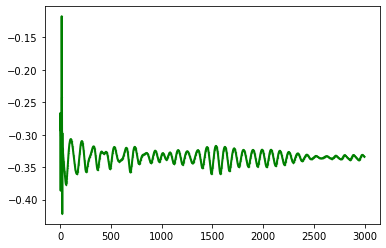

In [242]:
import matplotlib.pyplot as plt
import math
print(len(total_lossh_per_epoch_list))
#bottom, top = plt.ylim(0, total_lossh_per_epoch_list[200])
#bottom, top = plt.xlim(300, 1000)
total_lossh_per_epoch_list_adam = total_lossh_per_epoch_list
log_loss_list = []
for i in range(len(total_lossh_per_epoch_list)):
  log_loss = math.log10(math.log10(math.log10(total_lossh_per_epoch_list[i])))
  log_loss_list.append(log_loss) 
plt.plot(epoch_list, log_loss_list, color='green', marker='o', linewidth=2, markersize=0.2)


In [168]:
f1 = torch.tensor([1,2,3], dtype=torch.int32)
f2 = torch.tensor([1,2,3], dtype=torch.int32)
f3 = torch.tensor([1,2,3], dtype=torch.int32)
f4 = torch.tensor([1,2,3], dtype=torch.int32)
f5 = torch.tensor([1,2,3], dtype=torch.int32)
f6 = torch.tensor([1,2,3], dtype=torch.int32)

test_vector = torch.stack((f1,f2,f3,f4,f5,f6))
labels_test = torch.tensor(([2,2,1.82,1.64,0.82,0.67]), dtype=torch.float32)
test_vector = torch.t(test_vector)

for test in range(3):
  pred_test = DQN_H(test_vector[test])
  print(test_vector[test])
  #print(pred_test, labels_test)
  labels_test = calc_labels(test_vector[test])
  loss_test = loss_fn(pred_test,labels_test)
  #print (loss_test)

RuntimeError: ignored

In [11]:

# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 1, 6, 100, 6

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4
for t in range(500):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(x)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

99 0.4916035532951355
199 0.05217447876930237
299 0.005438933614641428
399 0.0005636289133690298
499 5.833563773194328e-05
